In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data=pd.read_csv("mnist_train.csv")

In [4]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.shape

(60000, 785)

In [15]:
data.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [17]:
data['label'].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

In [18]:
y=data['label']

In [19]:
x=data.drop('label',axis=1)

In [20]:
print(x.shape)
print(y.shape)

(60000, 784)
(60000,)


In [32]:
x[0:2]

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/home/thair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


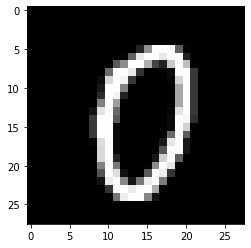

0


In [41]:
data=x.iloc[1000].as_matrix().reshape(28,28)
plt.imshow(data,cmap='gray')
plt.show()
print(y.iloc[1000])

In [42]:
X=x.head(1000)
Y=y.head(1000)

In [43]:
del x
del y

In [65]:
print(X.shape)
print(Y.shape)

(1000, 784)
(1000,)


In [45]:
from sklearn.preprocessing import StandardScaler
std_data=StandardScaler().fit_transform(X)

In [46]:
std_data.shape

(1000, 784)

In [47]:
cover_matrix=np.matmul(std_data.T,std_data)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [48]:
print(cover_matrix.shape)

(784, 784)


In [49]:
from scipy.linalg import eigh
values,vectors=eigh(cover_matrix,eigvals=(782,783))
print(values)
print(vectors.shape)

[33388.12911589 39552.26299558]
(784, 2)


In [68]:
new_PCA_data=np.matmul(std_data,vectors)
print(new_PCA_data.shape)

(1000, 2)


In [71]:
new_PCA_data[0:5]

array([[ 2.96464839, -0.5119814 ],
       [ 7.12339568,  8.20135175],
       [-7.9351737 ,  3.11316396],
       [ 0.57217772, -7.84243673],
       [-4.3330711 , -4.61039227]])

In [79]:
data_set=np.vstack((new_PCA_data.T,Y))

In [76]:
print(new_PCA_data.shape)
print(Y.shape)

(1000, 2)
(1000,)


In [80]:
data_set.shape

(3, 1000)

In [82]:
data_set=data_set.T
df=pd.DataFrame(data=data_set,columns=("col1","col2","label"))

In [83]:
df.head()

,col1,col2,label
0,2.964648,-0.511981,5.0
1,7.123396,8.201352,0.0
2,-7.935174,3.113164,4.0
3,0.572178,-7.842437,1.0
4,-4.333071,-4.610392,9.0


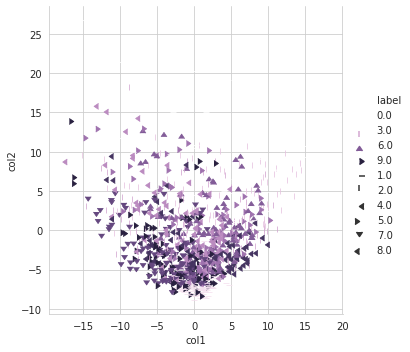

In [112]:
sns.relplot(x="col1",y="col2",style='label',hue="label",data=df,markers={float(i) for i in range(10)},palette="ch:r=0.2,l=1");

In [86]:
df["label"].value_counts()

7.0    117
1.0    116
4.0    105
9.0    100
2.0     99
0.0     97
6.0     94
3.0     93
5.0     92
8.0     87
Name: label, dtype: int64

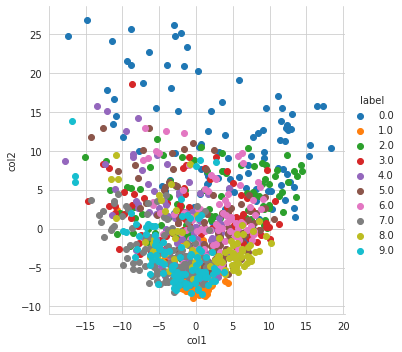

In [97]:
sns.set_style('whitegrid');
sns.FacetGrid(df,hue='label',size=5).map(plt.scatter,'col1','col2').add_legend();
plt.show()

In [113]:
print(X.shape)
print(Y.shape)

(1000, 784)
(1000,)


In [114]:
from sklearn import decomposition

In [115]:
pca=decomposition.PCA()

In [118]:
pca.n_components=2
pca_data=pca.fit_transform(X)

In [122]:
pca_data.shape

(1000, 2)

In [123]:
data_set=np.vstack((pca_data.T,Y))

In [124]:
data_set=data_set.T
df=pd.DataFrame(data=data_set,columns=("col1","col2","label"))

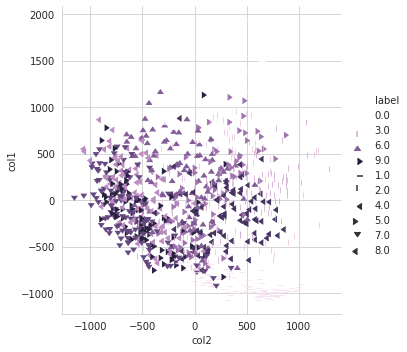

In [126]:
sns.relplot(x="col2",y="col1",style='label',hue="label",data=df,markers={float(i) for i in range(10)},palette="ch:r=0.2,l=1");